In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
cols = diabetes.columns[0:9]
print(cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


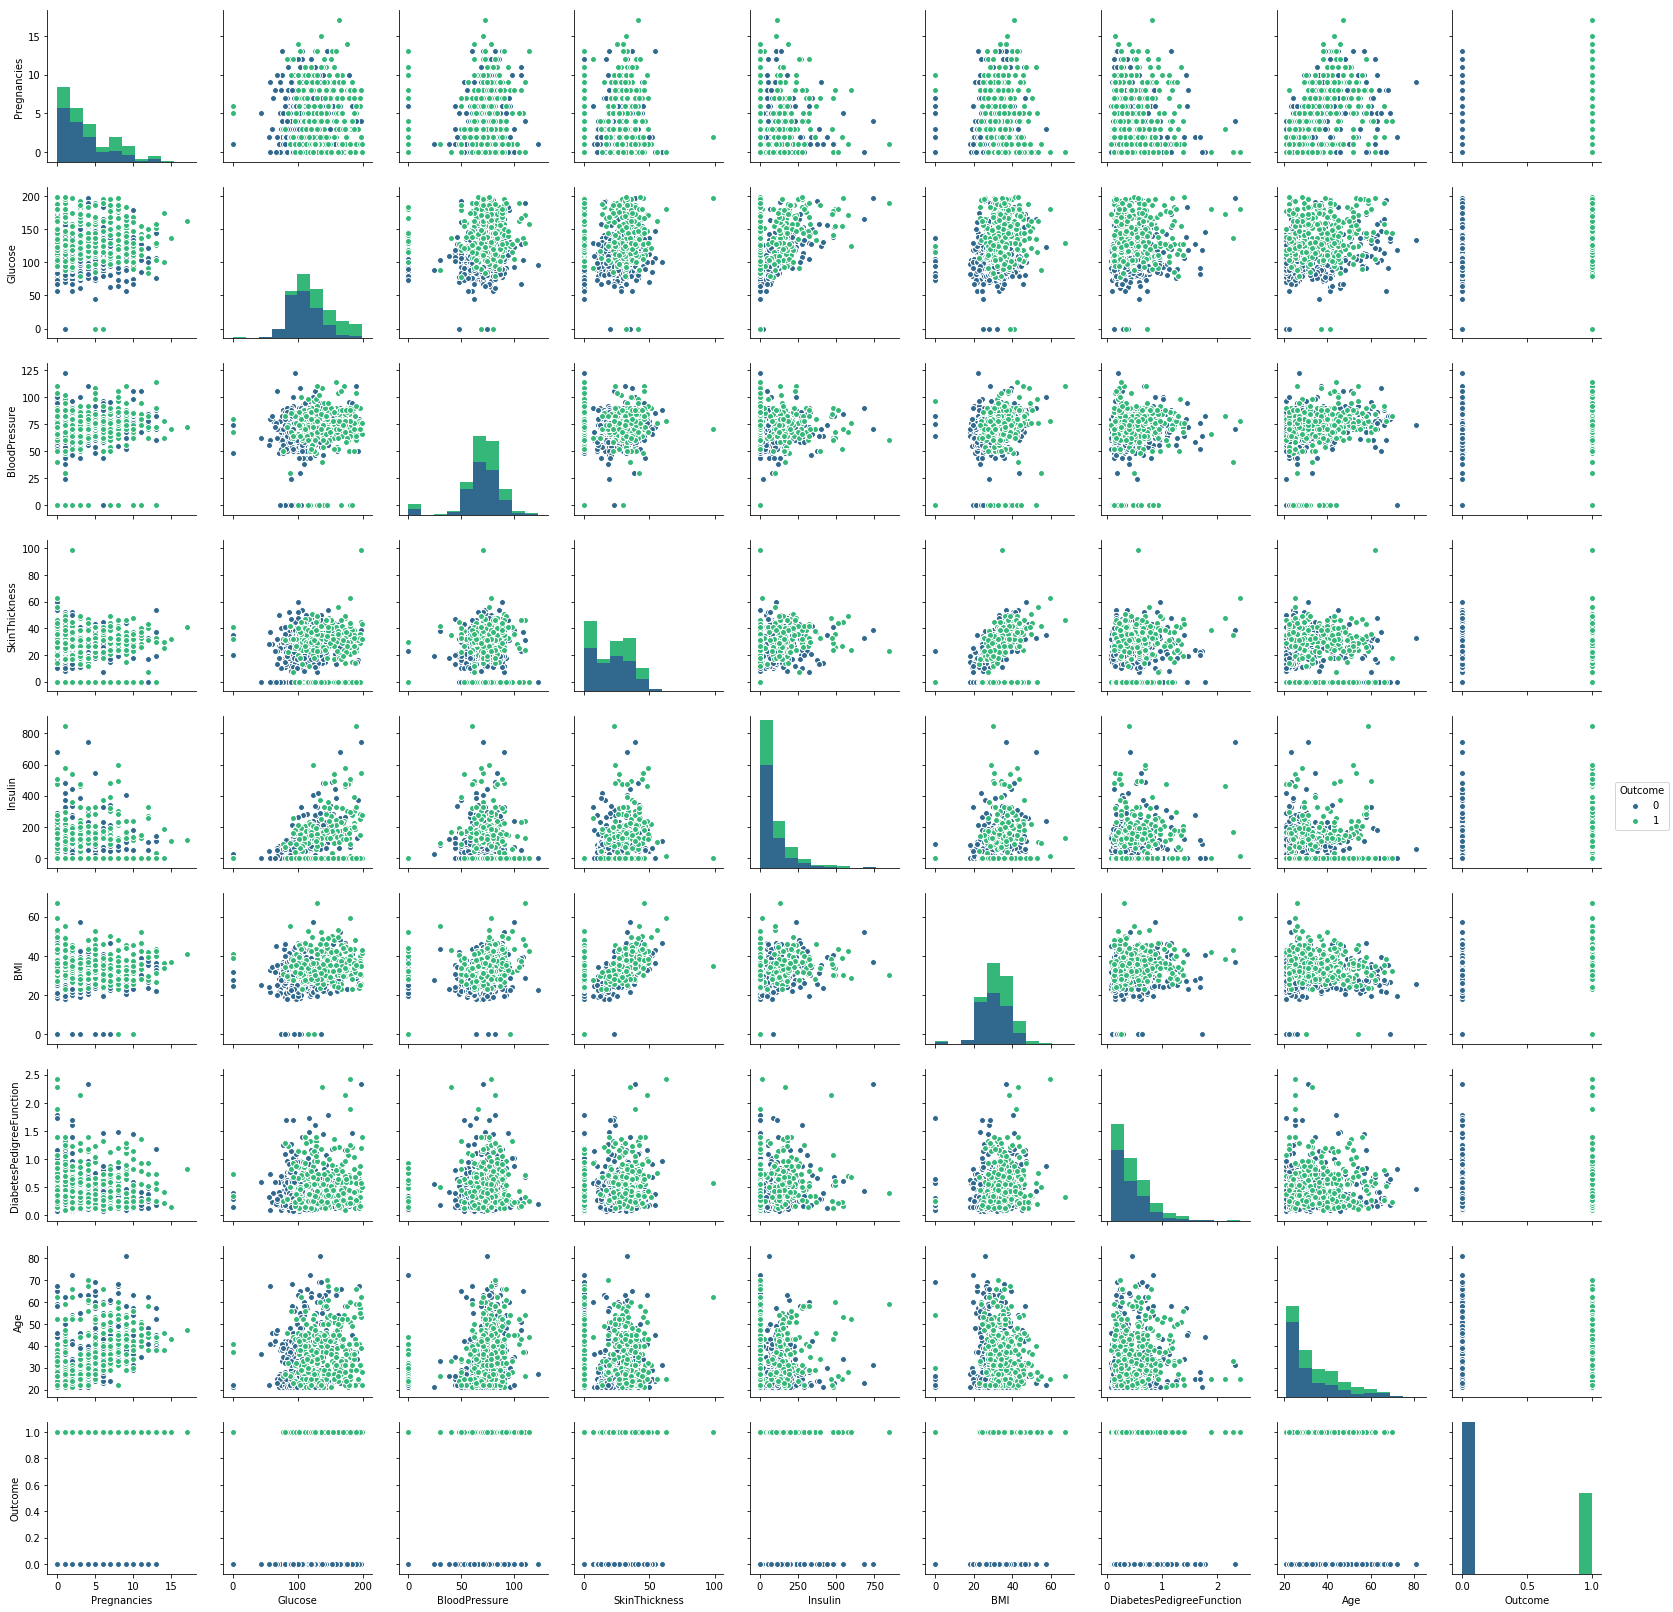

In [5]:
#Plotting all features against themselves to look for correlations

sns.pairplot(diabetes,hue='Outcome',palette='viridis')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


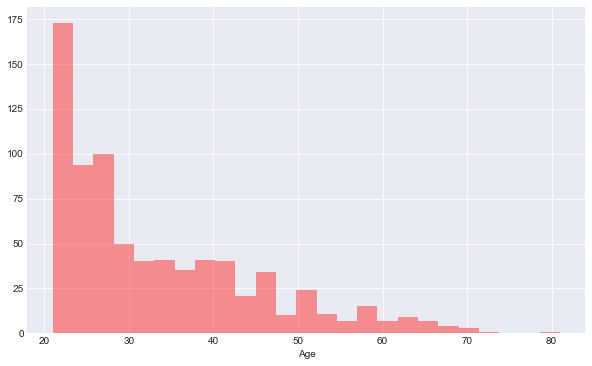

In [6]:
##Simple distribution of the Age of individuals within the data.

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.distplot(diabetes['Age'],bins=25,color='red',kde=False)

In [7]:
##Creating a function that can append results as a string for legend labels.

def result(outcome):
    if outcome == 0:
        return 'Healthy'
    else:
        return 'Diabetes'

In [8]:
#Creating new column in dataframe

diabetes['Result'] = diabetes['Outcome'].apply(result)

In [9]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Result
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,1,85,66,29,0,26.6,0.351,31,0,Healthy
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,1,89,66,23,94,28.1,0.167,21,0,Healthy
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes


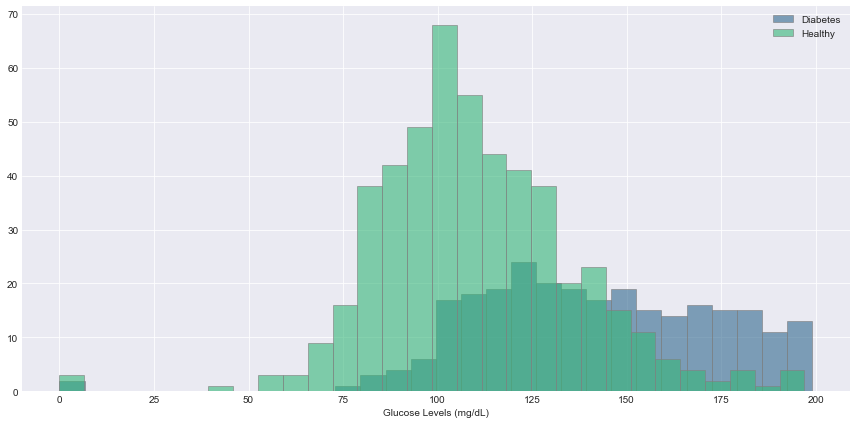

In [10]:
##Generation of stacked histograms comparing the distribution of certain features.

d = sns.FacetGrid(diabetes,hue='Result',hue_order=['Diabetes','Healthy'],palette='viridis',size=6,aspect=2)
d.map(plt.hist,'Glucose',bins=30,alpha=0.6,ec='grey')
plt.xlabel('Glucose Levels (mg/dL)')
plt.legend(loc=0)

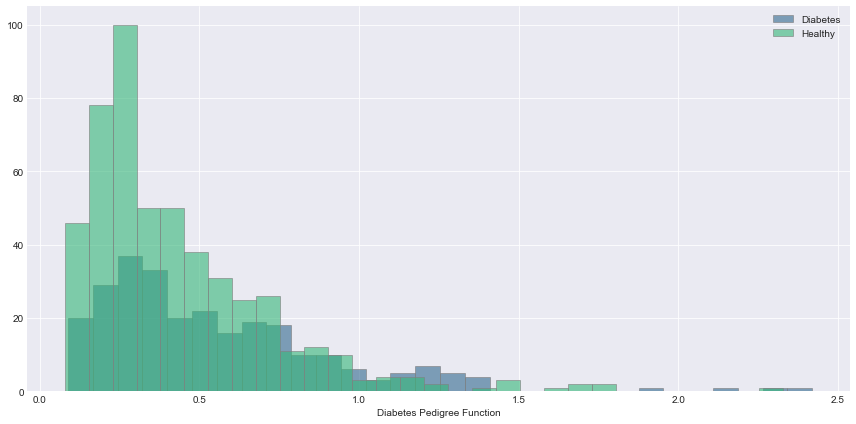

In [11]:
d = sns.FacetGrid(diabetes,hue='Result',palette='viridis',size=6,aspect=2)
d.map(plt.hist,'DiabetesPedigreeFunction',bins=30,alpha=0.6,ec='grey')
plt.xlabel('Diabetes Pedigree Function')
plt.legend(loc=0)

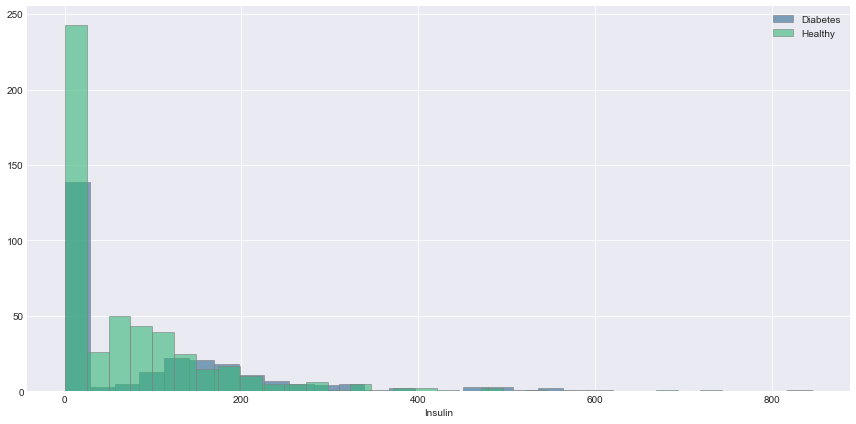

In [12]:
d = sns.FacetGrid(diabetes,hue='Result',palette='viridis',size=6,aspect=2)
d.map(plt.hist,'Insulin',bins=30,alpha=0.6,ec='grey')
plt.xlabel('Insulin')
plt.legend(loc=0)

In [13]:
##Splitting data to train algorithm

X = diabetes.drop(['Outcome','Result'],axis=1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

In [14]:
##Determining the best parameter values for the algorithm in order to maximize accuracy with this dataset and size.

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
vectParam = {'C': [1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'degree': [1,2,3,4,5,6]}

In [16]:
vect2 = GridSearchCV(SVC(),vectParam,verbose=3)

In [17]:
vect2.fit(X_test,y_test)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=1, degree=1, gamma=1 ..........................................
[CV] ................. C=1, degree=1, gamma=1, score=0.658824 -   0.0s
[CV] C=1, degree=1, gamma=1 ..........................................
[CV] ................. C=1, degree=1, gamma=1, score=0.658824 -   0.0s
[CV] C=1, degree=1, gamma=1 ..........................................
[CV] ................. C=1, degree=1, gamma=1, score=0.654762 -   0.0s
[CV] C=1, degree=1, gamma=0.1 ........................................
[CV] ............... C=1, degree=1, gamma=0.1, score=0.658824 -   0.0s
[CV] C=1, degree=1, gamma=0.1 ........................................
[CV] ............... C=1, degree=1, gamma=0.1, score=0.658824 -   0.0s
[CV] C=1, degree=1, gamma=0.1 ........................................
[CV] ............... C=1, degree=1, gamma=0.1, score=0.654762 -   0.0s
[CV] C=1, degree=1, gamma=0.01 .......................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=1, degree=5, gamma=0.01, score=0.658824 -   0.0s
[CV] C=1, degree=5, gamma=0.01 .......................................
[CV] .............. C=1, degree=5, gamma=0.01, score=0.670588 -   0.0s
[CV] C=1, degree=5, gamma=0.01 .......................................
[CV] .............. C=1, degree=5, gamma=0.01, score=0.630952 -   0.0s
[CV] C=1, degree=5, gamma=0.001 ......................................
[CV] ............. C=1, degree=5, gamma=0.001, score=0.788235 -   0.0s
[CV] C=1, degree=5, gamma=0.001 ......................................
[CV] ............. C=1, degree=5, gamma=0.001, score=0.717647 -   0.0s
[CV] C=1, degree=5, gamma=0.001 ......................................
[CV] ............. C=1, degree=5, gamma=0.001, score=0.714286 -   0.0s
[CV] C=1, degree=5, gamma=0.0001 .....................................
[CV] ............ C=1, degree=5, gamma=0.0001, score=0.823529 -   0.0s
[CV] C=1, degree=5, gamma=0.0001 .....................................
[CV] .

[CV] ........... C=10, degree=3, gamma=0.0001, score=0.694118 -   0.0s
[CV] C=10, degree=3, gamma=0.0001 ....................................
[CV] ........... C=10, degree=3, gamma=0.0001, score=0.678571 -   0.0s
[CV] C=10, degree=4, gamma=1 .........................................
[CV] ................ C=10, degree=4, gamma=1, score=0.658824 -   0.0s
[CV] C=10, degree=4, gamma=1 .........................................
[CV] ................ C=10, degree=4, gamma=1, score=0.658824 -   0.0s
[CV] C=10, degree=4, gamma=1 .........................................
[CV] ................ C=10, degree=4, gamma=1, score=0.654762 -   0.0s
[CV] C=10, degree=4, gamma=0.1 .......................................
[CV] .............. C=10, degree=4, gamma=0.1, score=0.658824 -   0.0s
[CV] C=10, degree=4, gamma=0.1 .......................................
[CV] .............. C=10, degree=4, gamma=0.1, score=0.658824 -   0.0s
[CV] C=10, degree=4, gamma=0.1 .......................................
[CV] .

[CV] ............. C=100, degree=2, gamma=0.1, score=0.658824 -   0.0s
[CV] C=100, degree=2, gamma=0.1 ......................................
[CV] ............. C=100, degree=2, gamma=0.1, score=0.658824 -   0.0s
[CV] C=100, degree=2, gamma=0.1 ......................................
[CV] ............. C=100, degree=2, gamma=0.1, score=0.654762 -   0.0s
[CV] C=100, degree=2, gamma=0.01 .....................................
[CV] ............ C=100, degree=2, gamma=0.01, score=0.647059 -   0.0s
[CV] C=100, degree=2, gamma=0.01 .....................................
[CV] ............ C=100, degree=2, gamma=0.01, score=0.658824 -   0.0s
[CV] C=100, degree=2, gamma=0.01 .....................................
[CV] ............ C=100, degree=2, gamma=0.01, score=0.595238 -   0.0s
[CV] C=100, degree=2, gamma=0.001 ....................................
[CV] ........... C=100, degree=2, gamma=0.001, score=0.682353 -   0.0s
[CV] C=100, degree=2, gamma=0.001 ....................................
[CV] .

[CV] .......... C=1000, degree=3, gamma=0.001, score=0.670588 -   0.0s
[CV] C=1000, degree=3, gamma=0.001 ...................................
[CV] .......... C=1000, degree=3, gamma=0.001, score=0.682353 -   0.0s
[CV] C=1000, degree=3, gamma=0.001 ...................................
[CV] .......... C=1000, degree=3, gamma=0.001, score=0.619048 -   0.0s
[CV] C=1000, degree=3, gamma=0.0001 ..................................
[CV] ......... C=1000, degree=3, gamma=0.0001, score=0.658824 -   0.0s
[CV] C=1000, degree=3, gamma=0.0001 ..................................
[CV] ......... C=1000, degree=3, gamma=0.0001, score=0.705882 -   0.0s
[CV] C=1000, degree=3, gamma=0.0001 ..................................
[CV] ......... C=1000, degree=3, gamma=0.0001, score=0.571429 -   0.0s
[CV] C=1000, degree=4, gamma=1 .......................................
[CV] .............. C=1000, degree=4, gamma=1, score=0.658824 -   0.0s
[CV] C=1000, degree=4, gamma=1 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [18]:
vect2.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.001}

In [19]:
vect2.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
vect2Pred = vect2.predict(X_test)

In [21]:
##Results from prediction and classification of original dataset

print(classification_report(y_test,vect2Pred))
print('\n')
print(confusion_matrix(y_test,vect2Pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91       167
          1       0.97      0.66      0.78        87

avg / total       0.89      0.87      0.87       254



[[165   2]
 [ 30  57]]


In [22]:
##Instantiate StandardScaler, which will standardize all values in dataset to 0 mean and have a unit, variance.
##This will increase efficiency of the estimator, and accuracy of the algorithm.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
newDiabetes = diabetes.drop('Result',axis=1)

In [25]:
scaler.fit(newDiabetes)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaledData=scaler.transform(newDiabetes)

In [27]:
##Using Principal Component Analyis in order to reduce dimensions from 8 to 4
##Which will minimize the amount of unexplained variance between features

pca = PCA(n_components=4)

In [28]:
pca.fit(scaledData)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
x_pca = pca.transform(scaledData)

Text(0.5,1,'PCA on Diabetes Dataset')

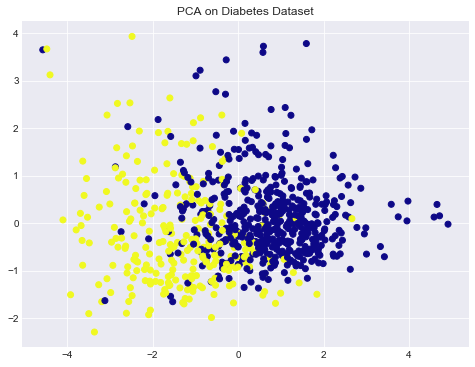

In [30]:
##Graph of the dataset showing the explained variance between features. Blue indicates Diabetes, Yellow indicates Healthy.

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,3],c=newDiabetes['Outcome'],cmap='plasma')
plt.title('PCA on Diabetes Dataset')

In [31]:
##Generation of a dataframe that has gone through dimensionality reduction in order to 
##see which features explain the majority of variance in results, and in which dimension.

diabetesComp = pd.DataFrame(pca.components_,columns=cols)

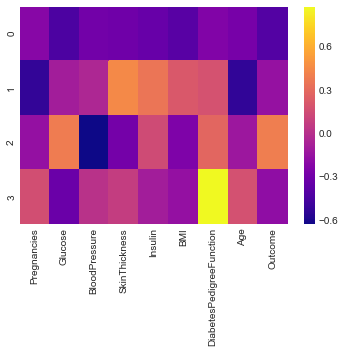

In [32]:
##Generation of the dataframe as a heatmap, to visualize most impactful feature,
##based on explained variance.

sns.heatmap(diabetesComp,cmap='plasma')

In [33]:
##Training algorithm once again, but using new data with reduced dimensions and more variance explained.

X = x_pca
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

In [34]:
##Sifting through three major parameters, and running the algorithm against all possibilities 
##contained within vectParam dictionary for highest accuracy in classification

vectParam = {'C': [1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'degree': [1,2,3,4,5,6]}

In [35]:
vect2 = GridSearchCV(SVC(),vectParam,verbose=3)

In [36]:
vect2.fit(X_test,y_test)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=1, degree=1, gamma=1 ..........................................
[CV] ................. C=1, degree=1, gamma=1, score=0.941176 -   0.0s
[CV] C=1, degree=1, gamma=1 ..........................................
[CV] ................. C=1, degree=1, gamma=1, score=0.847059 -   0.0s
[CV] C=1, degree=1, gamma=1 ..........................................
[CV] ................. C=1, degree=1, gamma=1, score=0.845238 -   0.0s
[CV] C=1, degree=1, gamma=0.1 ........................................
[CV] ............... C=1, degree=1, gamma=0.1, score=0.964706 -   0.0s
[CV] C=1, degree=1, gamma=0.1 ........................................
[CV] ............... C=1, degree=1, gamma=0.1, score=0.929412 -   0.0s
[CV] C=1, degree=1, gamma=0.1 ........................................
[CV] ............... C=1, degree=1, gamma=0.1, score=0.869048 -   0.0s
[CV] C=1, degree=1, gamma=0.01 .......................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=10, degree=3, gamma=0.1, score=0.964706 -   0.0s
[CV] C=10, degree=3, gamma=0.1 .......................................
[CV] .............. C=10, degree=3, gamma=0.1, score=0.894118 -   0.0s
[CV] C=10, degree=3, gamma=0.1 .......................................
[CV] .............. C=10, degree=3, gamma=0.1, score=0.845238 -   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] ............. C=10, degree=3, gamma=0.01, score=0.952941 -   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] ............. C=10, degree=3, gamma=0.01, score=0.941176 -   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] ............. C=10, degree=3, gamma=0.01, score=0.892857 -   0.0s
[CV] C=10, degree=3, gamma=0.001 .....................................
[CV] ............ C=10, degree=3, gamma=0.001, score=0.941176 -   0.0s
[CV] C=10, degree=3, gamma=0.001 .....................................
[CV] .

[CV] ........... C=100, degree=5, gamma=0.001, score=0.941176 -   0.0s
[CV] C=100, degree=5, gamma=0.001 ....................................
[CV] ........... C=100, degree=5, gamma=0.001, score=0.845238 -   0.0s
[CV] C=100, degree=5, gamma=0.0001 ...................................
[CV] .......... C=100, degree=5, gamma=0.0001, score=0.941176 -   0.0s
[CV] C=100, degree=5, gamma=0.0001 ...................................
[CV] .......... C=100, degree=5, gamma=0.0001, score=0.905882 -   0.0s
[CV] C=100, degree=5, gamma=0.0001 ...................................
[CV] .......... C=100, degree=5, gamma=0.0001, score=0.845238 -   0.0s
[CV] C=100, degree=6, gamma=1 ........................................
[CV] ............... C=100, degree=6, gamma=1, score=0.917647 -   0.0s
[CV] C=100, degree=6, gamma=1 ........................................
[CV] ............... C=100, degree=6, gamma=1, score=0.811765 -   0.0s
[CV] C=100, degree=6, gamma=1 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [37]:
vect2.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01}

In [38]:
vect2.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
##Creating a prediction using the new parameters for the SVM algorithm, and running a class. report
##and confusion matrix to determine accuracy.

vect2Pred = vect2.predict(X_test)

In [40]:
print(classification_report(y_test,vect2Pred))
print('\n')
print(confusion_matrix(y_test,vect2Pred))

             precision    recall  f1-score   support

          0       0.97      0.93      0.95       167
          1       0.87      0.94      0.91        87

avg / total       0.94      0.93      0.93       254



[[155  12]
 [  5  82]]


In [41]:
print('As you can see, the percent accuracy went from merely 82% to almost 94%.')

As you can see, the percent accuracy went from merely 82% to almost 94%.
